In [237]:
import os
import sys
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt

### Dataset Statistics

In [238]:
base = '/home/pbaweja/SciREX/scirex_dataset/release_data'
train = os.path.join(base, 'train.jsonl')
dev = os.path.join(base, 'dev.jsonl')
test = os.path.join(base, 'test.jsonl')

In [239]:
train_df = pd.read_json(path_or_buf=train, lines=True)
dev_df = pd.read_json(path_or_buf=dev, lines=True)
test_df = pd.read_json(path_or_buf=test, lines=True)

In [168]:
print("# of training documents: ", len(train_df))
print("# of dev documents: ", len(dev_df))
print("# of test documents: ", len(test_df))

# of training documents:  306
# of dev documents:  66
# of test documents:  66


### Train:Dev:Test::70:15:15

In [169]:
train_df.head()

,coref,coref_non_salient,doc_id,method_subrelations,n_ary_relations,ner,sections,sentences,words
0,"{'Cityscapes': [[1260, 1261], [1272, 1273], [4...","{'0': [[1966, 1970], [2024, 2028], [5195, 5198...",000f90380d768a85e2316225854fc377c079b5c4,"{'FRRN': [[[0, 4], 'FRRN']]}","[{'Material': 'Cityscapes', 'Method': 'FRRN', ...","[[0, 5, Method], [6, 8, Task], [14, 17, Task],...","[[0, 11], [11, 238], [238, 1185], [1185, 2029]...","[[0, 11], [11, 14], [14, 43], [43, 71], [71, 1...","[Full, -, Resolution, Residual, Networks, for,..."
1,"{'Dice-based_loss': [[875, 878], [1907, 1909],...","{'0': [[2152, 2153], [2155, 2156]], '1': [[363...",0012de6bec1f25599e4f02517637e531a71909b9,"{'V-Net___Dice-based_loss': [[[0, 5], 'V-Net']...","[{'Material': 'PROMISE_2012', 'Method': 'V-Net...","[[2, 5, Method], [11, 15, Task], [15, 18, Meth...","[[0, 213], [213, 913], [913, 1749], [1749, 204...","[[0, 15], [15, 39], [39, 65], [65, 87], [87, 1...","[document, :, V, -, Net, :, Fully, Convolution..."
2,"{'BLEU-1': [], 'BLEU-4': [], 'BiDAF': [[2, 7],...","{'0': [[1625, 1630], [4922, 4927]], '1': [[136...",007ab5528b3bd310a80d553cccad4b78dc496b02,"{'BiDAF': [[[0, 5], 'BiDAF']], 'BiDAF__ensembl...","[{'Material': 'CNN___Daily_Mail', 'Method': 'B...","[[2, 7, Method], [8, 10, Task], [10, 12, Task]...","[[0, 169], [169, 837], [837, 975], [975, 1088]...","[[0, 10], [10, 36], [36, 47], [47, 86], [86, 1...","[document, :, Bi, -, Directional, Attention, F..."
3,"{'50D_stacked_TC-LSTMs': [[565, 568], [569, 57...","{'0': [[208, 211], [224, 227], [718, 720], [19...",0095c269e7d0c990249312687fc43521019809c4,"{'50D_stacked_TC-LSTMs': [[[0, 20], '50D_stack...","[{'Material': 'SNLI', 'Method': '50D_stacked_T...","[[2, 7, Task], [20, 24, Task], [25, 28, Method...","[[0, 149], [149, 253], [253, 339], [339, 430],...","[[0, 11], [11, 29], [29, 59], [59, 82], [82, 1...","[document, :, Modelling, Interaction, of, Sent..."
4,"{'AlphaGo_Zero': [[71, 74], [612, 613], [724, ...","{'0': [[709, 712], [941, 943], [1086, 1088], [...",00b1cdc5bd77bf27f9b1ca630365eeeb456913b4,"{'AlphaGo_Zero': [[[0, 12], 'AlphaGo_Zero']], ...","[{'Material': 'ELO_Ratings', 'Method': 'AlphaG...","[[3, 4, Task], [5, 6, Task], [12, 16, Method],...","[[0, 2346], [2346, 2349], [2349, 2352], [2352,...","[[0, 16], [16, 34], [34, 67], [67, 96], [96, 1...","[document, :, Mastering, Chess, and, Shogi, by..."


In [170]:
test_df.head()

,coref,coref_non_salient,doc_id,method_subrelations,n_ary_relations,ner,sections,sentences,words
0,"{'Age_Estimation': [[61, 63], [198, 200], [231...","{'0': [[1145, 1149], [7417, 7425]], '1': [[225...",02567fd428a675ca91a0c6786f47f3e35881bcbd,"{'DLDL_VGG-Face': [[[0, 4], 'DLDL'], [[5, 13],...","[{'Material': 'ChaLearn_2015', 'Method': 'DLDL...","[[2, 6, Method], [7, 9, Task], [9, 12, Method]...","[[0, 241], [241, 1471], [1471, 2011], [2011, 2...","[[0, 9], [9, 26], [26, 42], [42, 76], [76, 94]...","[document, :, Deep, Label, Distribution, Learn..."
1,"{'CNN_Input': [[2564, 2565], [2692, 2693]], 'L...","{'0': [[776, 779], [3736, 3739], [4747, 4749]]...",02b3d1d162080d9aefd3fc30a0bcc9a843073b5d,"{'LSTM-8192-1024': [[[0, 14], 'LSTM-8192-1024'...","[{'Material': 'One_Billion_Word', 'Method': 'L...","[[8, 11, Method], [21, 23, Task], [62, 66, Met...","[[0, 149], [149, 968], [968, 1000], [1000, 140...","[[0, 24], [24, 53], [53, 80], [80, 131], [131,...","[In, this, work, we, explore, recent, advances..."
2,"{'MAP': [], 'PASCAL_VOC_2007': [[3384, 3388], ...","{'0': [[52, 54], [380, 382], [427, 429], [1135...",0398552184f80db111e9c28bf533b395f233ac00,"{'Self-paced_curriculum_learning': [[[0, 30], ...","[{'Material': 'PASCAL_VOC_2007', 'Method': 'Se...","[[0, 3, Task], [4, 8, Task], [10, 15, Method],...","[[0, 15], [15, 225], [225, 1396], [1396, 1965]...","[[0, 15], [15, 18], [18, 34], [34, 67], [67, 1...","[Bridging, Saliency, Detection, to, Weakly, Su..."
3,"{'CH__N-gram': [[1093, 1097], [2231, 2235], [2...","{'0': [[1015, 1018], [1548, 1549], [1561, 1562...",05d2700846c0323f79c1344aca5333994c7c03a5,"{'IBM_2016': [[[0, 8], 'IBM_2016']], 'RNN___VG...","[{'Material': 'Switchboard___Hub500', 'Method'...","[[3, 11, Task], [16, 21, Method], [24, 27, Met...","[[0, 151], [151, 629], [629, 758], [758, 1168]...","[[0, 11], [11, 50], [50, 97], [97, 117], [117,...","[document, :, The, IBM, 2016, English, Convers..."
4,"{'ImageNet': [[142, 148], [217, 219], [3922, 3...","{'0': [[248, 251], [261, 263]], '1': [[1741, 1...",0626908dd710b91aece1a81f4ca0635f23fc47f3,"{'Inception_V3': [[[0, 12], 'Inception_V3']]}","[{'Material': 'ImageNet', 'Method': 'Inception...","[[4, 6, Method], [7, 9, Task], [9, 11, Method]...","[[0, 212], [212, 896], [896, 1384], [1384, 159...","[[0, 9], [9, 34], [34, 52], [52, 106], [106, 1...","[document, :, Rethinking, the, Inception, Arch..."


In [192]:
def get_total_salient_mentions(df):
    total_salient_mentions = 0
    all_salient_mentions = []
    for i in range(len(df)):
        total_salient_mentions += len(df['coref'][i].keys())
        
        salient_mentions = [*df['coref'][i]]
        for mention in salient_mentions:
            all_salient_mentions.append(mention)
    
    all_salient_mentions_string = ' '.join(all_salient_mentions)
      
    return total_salient_mentions, all_salient_mentions_string

In [193]:
total_salient_train, all_salient_train = get_total_salient_mentions(train_df)
total_salient_dev, all_salient_dev = get_total_salient_mentions(dev_df)
total_salient_test, all_salient_test = get_total_salient_mentions(test_df)

In [194]:
len(all_salient_train)

37735

In [189]:
all_salient_train

'CT-150 BiDaF_Baseline BiGRU Reading_Twice_for_NLU Transformer-XL_-_12_layers BSD68_sigma25 MHP_v2_0 MPN-COV Transformer-XL KITTI_Cars_Moderate Gorila Seq-KD MRF CNN___Bi-RNN___CTC__speech_to_letters_ AS_reader__greedy_ SRMDNF AS_Reader__ensemble_model_ OntoNotes SciTail LOMO___XQDA Bing_News Amr_Parsing RotoWire__Relation_Generation_ Attentional_encoder-decoder___BPE WIDER_Face__Medium_ WSDDN-Ens MCL BUCC_French-to-English LSTM5 Faster_R-CNN___box_refinement___context___multi-scale_testing Pythia_v0_1 RNN Masque_Q_A_Style MOVIE CamVid UNBC-McMaster_ShoulderPain_dataset PCK seq2-bown-CNN F-Measure VoxForge_American-Canadian Coreference_Resolution viewpoint_invariance Accuracy-CN Viewpoint_II_AEPE CNN_Seq2Seq___Fluency_Boost Bi-RNN___Attention Trajectory_Prediction R2CNN MSSRNet SR 3D_Object_Reconstruction AWD-LSTM-MoS Cora ESIM___ELMo Smooth_Network_with_Channel_Attention_Block Image_Denoising Part-Of-Speech_Tagging Synthetic-to-Real_Translation Atari_Games ConvS2S__ensemble_ Stack-onl

In [184]:
print("avg # of salient mentions in the train documents: ", total_salient_train/len(train_df))
print("avg # of salient mentions in the dev documents: ", total_salient_dev/len(dev_df))
print("avg # of salient mentions in the test documents: ", total_salient_test/len(test_df))

avg # of salient mentions in the train documents:  7.921568627450981
avg # of salient mentions in the dev documents:  7.575757575757576
avg # of salient mentions in the test documents:  7.53030303030303


# Wordcloud of the salient mentions

In [185]:
from wordcloud import WordCloud, STOPWORDS

In [186]:
stopwords = set(STOPWORDS)

### Training dataset

In [187]:
wordcloud = WordCloud(width = 1200, height = 1200,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(all_salient_train)

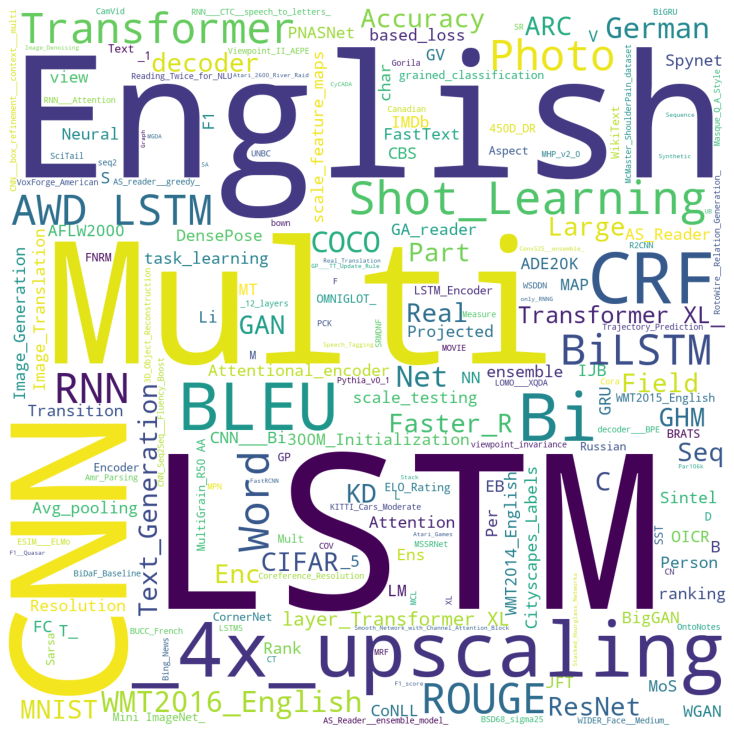

In [188]:
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

### Dev dataset

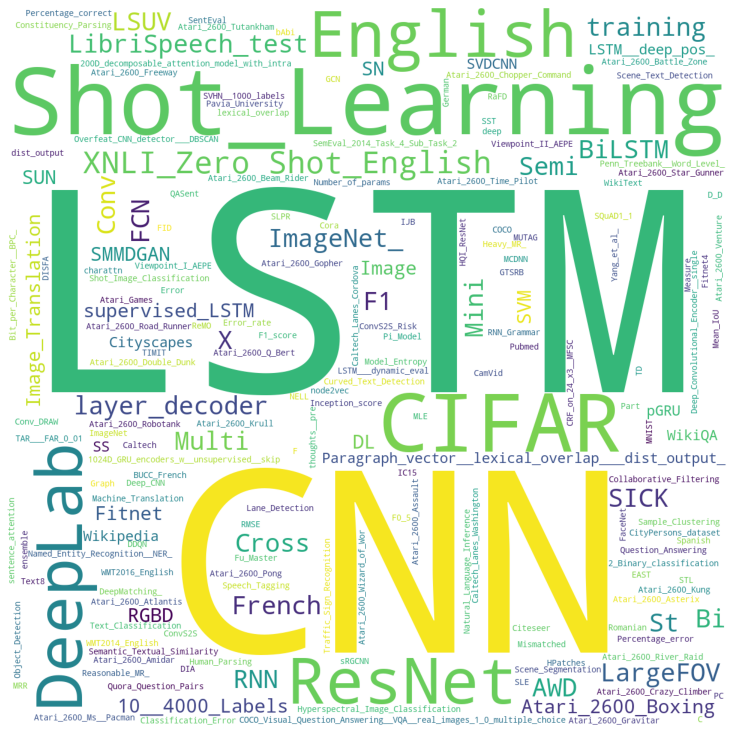

In [190]:
wordcloud = WordCloud(width = 1200, height = 1200,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(all_salient_dev)
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

### Test Dataset

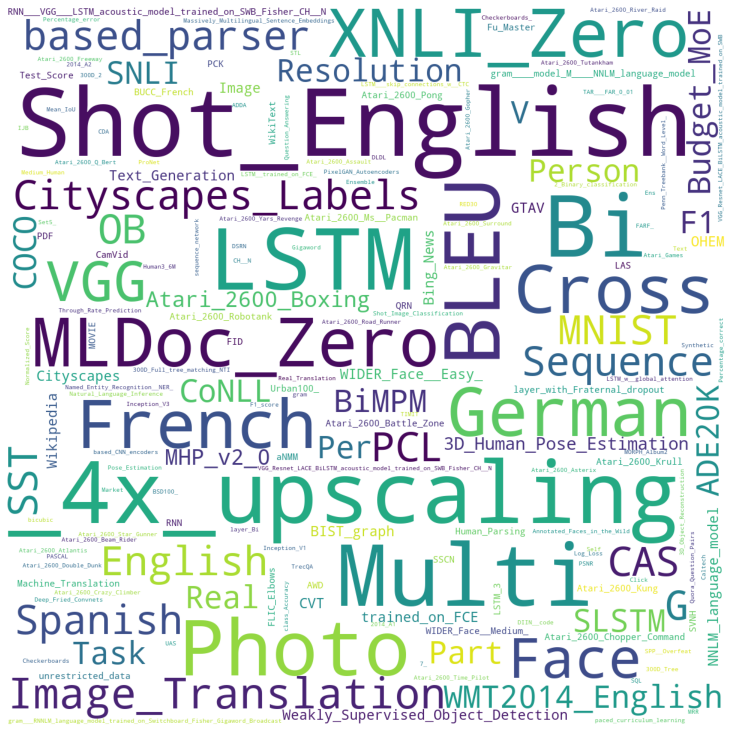

In [191]:
wordcloud = WordCloud(width = 1200, height = 1200,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(all_salient_test)
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

### Compare test results and test ground truth

In [154]:
salient_mentions_file = '/home/pbaweja/SciREX/test_outputs/salient_clusters_predictions_using_gold.jsonl'

In [155]:
pred_salient_df = pd.read_json(path_or_buf=salient_mentions_file, lines=True)

In [156]:
pred_salient_df.head()

,clusters,doc_id,spans
0,"{'MAE': [[5334, 5335], [6312, 6313], [9448, 94...",02567fd428a675ca91a0c6786f47f3e35881bcbd,"[[2, 6], [7, 9], [9, 12], [13, 14], [18, 19], ..."
1,"{'Language_Modelling': [[246, 247], [152, 154]...",02b3d1d162080d9aefd3fc30a0bcc9a843073b5d,"[[8, 11], [12, 16], [21, 23], [41, 43], [62, 6..."
2,"{'Self-paced_curriculum_learning': [[1967, 197...",0398552184f80db111e9c28bf533b395f233ac00,"[[1, 3], [4, 8], [10, 15], [18, 23], [24, 25],..."
3,{'RNN___VGG___LSTM_acoustic_model_trained_on_S...,05d2700846c0323f79c1344aca5333994c7c03a5,"[[3, 11], [16, 21], [24, 27], [32, 33], [41, 4..."
4,"{'Inception_V3': [[3121, 3123], [717, 721], [8...",0626908dd710b91aece1a81f4ca0635f23fc47f3,"[[4, 6], [7, 9], [9, 11], [24, 27], [37, 40], ..."


In [157]:
pred_salient_df['clusters'][0]

{'MAE': [[5334, 5335],
  [6312, 6313],
  [9448, 9449],
  [1008, 1011],
  [2632, 2634],
  [4924, 4925],
  [6276, 6277],
  [6685, 6686],
  [9417, 9418],
  [4942, 4943],
  [9230, 9231],
  [9666, 9667],
  [6835, 6836],
  [5483, 5484],
  [6369, 6370],
  [5012, 5015],
  [9685, 9686],
  [4920, 4923],
  [9157, 9159]],
 'DLDL_VGG-Face': [[9771, 9776],
  [2474, 2475],
  [9768, 9769],
  [141, 145],
  [2015, 2016],
  [1376, 1377],
  [2400, 2401],
  [5264, 5265],
  [6769, 6770],
  [9888, 9889],
  [2723, 2724],
  [2, 6],
  [3109, 3110],
  [6949, 6950],
  [9501, 9502],
  [5545, 5546],
  [6825, 6826],
  [1267, 1268],
  [5293, 5294],
  [5485, 5486],
  [9133, 9134],
  [9645, 9646],
  [9167, 9168],
  [2767, 2768],
  [1347, 1348],
  [9366, 9367],
  [5608, 5609],
  [9786, 9787],
  [2036, 2037],
  [2060, 2061],
  [9839, 9840],
  [4425, 4426],
  [5279, 5282],
  [8587, 8588],
  [139, 140],
  [5203, 5204],
  [5459, 5460],
  [5591, 5592],
  [5715, 5716],
  [8331, 8332],
  [8843, 8844],
  [8269, 8270],
  [1273, 

In [158]:
test_df.head()

,coref,coref_non_salient,doc_id,method_subrelations,n_ary_relations,ner,sections,sentences,words
0,"{'Age_Estimation': [[61, 63], [198, 200], [231...","{'0': [[1145, 1149], [7417, 7425]], '1': [[225...",02567fd428a675ca91a0c6786f47f3e35881bcbd,"{'DLDL_VGG-Face': [[[0, 4], 'DLDL'], [[5, 13],...","[{'Material': 'ChaLearn_2015', 'Method': 'DLDL...","[[2, 6, Method], [7, 9, Task], [9, 12, Method]...","[[0, 241], [241, 1471], [1471, 2011], [2011, 2...","[[0, 9], [9, 26], [26, 42], [42, 76], [76, 94]...","[document, :, Deep, Label, Distribution, Learn..."
1,"{'CNN_Input': [[2564, 2565], [2692, 2693]], 'L...","{'0': [[776, 779], [3736, 3739], [4747, 4749]]...",02b3d1d162080d9aefd3fc30a0bcc9a843073b5d,"{'LSTM-8192-1024': [[[0, 14], 'LSTM-8192-1024'...","[{'Material': 'One_Billion_Word', 'Method': 'L...","[[8, 11, Method], [21, 23, Task], [62, 66, Met...","[[0, 149], [149, 968], [968, 1000], [1000, 140...","[[0, 24], [24, 53], [53, 80], [80, 131], [131,...","[In, this, work, we, explore, recent, advances..."
2,"{'MAP': [], 'PASCAL_VOC_2007': [[3384, 3388], ...","{'0': [[52, 54], [380, 382], [427, 429], [1135...",0398552184f80db111e9c28bf533b395f233ac00,"{'Self-paced_curriculum_learning': [[[0, 30], ...","[{'Material': 'PASCAL_VOC_2007', 'Method': 'Se...","[[0, 3, Task], [4, 8, Task], [10, 15, Method],...","[[0, 15], [15, 225], [225, 1396], [1396, 1965]...","[[0, 15], [15, 18], [18, 34], [34, 67], [67, 1...","[Bridging, Saliency, Detection, to, Weakly, Su..."
3,"{'CH__N-gram': [[1093, 1097], [2231, 2235], [2...","{'0': [[1015, 1018], [1548, 1549], [1561, 1562...",05d2700846c0323f79c1344aca5333994c7c03a5,"{'IBM_2016': [[[0, 8], 'IBM_2016']], 'RNN___VG...","[{'Material': 'Switchboard___Hub500', 'Method'...","[[3, 11, Task], [16, 21, Method], [24, 27, Met...","[[0, 151], [151, 629], [629, 758], [758, 1168]...","[[0, 11], [11, 50], [50, 97], [97, 117], [117,...","[document, :, The, IBM, 2016, English, Convers..."
4,"{'ImageNet': [[142, 148], [217, 219], [3922, 3...","{'0': [[248, 251], [261, 263]], '1': [[1741, 1...",0626908dd710b91aece1a81f4ca0635f23fc47f3,"{'Inception_V3': [[[0, 12], 'Inception_V3']]}","[{'Material': 'ImageNet', 'Method': 'Inception...","[[4, 6, Method], [7, 9, Task], [9, 11, Method]...","[[0, 212], [212, 896], [896, 1384], [1384, 159...","[[0, 9], [9, 34], [34, 52], [52, 106], [106, 1...","[document, :, Rethinking, the, Inception, Arch..."


In [161]:
test_df['coref'][0]

{'Age_Estimation': [[61, 63],
  [198, 200],
  [231, 233],
  [313, 315],
  [886, 888],
  [1369, 1370],
  [1507, 1508],
  [1631, 1633],
  [1661, 1662],
  [1695, 1697],
  [1977, 1978],
  [2283, 2285],
  [2319, 2321],
  [2883, 2885],
  [2899, 2901],
  [3753, 3755],
  [4036, 4038],
  [4058, 4060],
  [4105, 4107],
  [4451, 4452],
  [4939, 4941],
  [5448, 5450],
  [6201, 6203],
  [6866, 6868],
  [9586, 9588],
  [428, 429],
  [463, 464],
  [478, 479],
  [519, 520],
  [582, 583],
  [938, 939],
  [1342, 1343],
  [2090, 2091],
  [2161, 2162],
  [2914, 2915],
  [2932, 2933],
  [4127, 4128],
  [4179, 4180],
  [4272, 4273],
  [4294, 4295],
  [4310, 4311],
  [4564, 4565],
  [4953, 4954],
  [4964, 4965],
  [5539, 5540],
  [5770, 5771],
  [9057, 9058],
  [9243, 9244]],
 'ChaLearn_2015': [[4190, 4193],
  [4202, 4203],
  [4753, 4754],
  [4835, 4836],
  [4846, 4847],
  [5119, 5120],
  [5390, 5391],
  [5562, 5563],
  [5629, 5630],
  [8224, 8225],
  [8815, 8816],
  [8942, 8943],
  [9016, 9017],
  [9246, 924

### NER prediction

In [163]:
pred_ner_file = '/home/pbaweja/SciREX/test_outputs/ner_predictions.jsonl'
pred_ner = pd.read_json(path_or_buf=pred_ner_file, lines=True)

In [164]:
pred_ner.head()

,doc_id,ner,sections,sentences,words
0,02567fd428a675ca91a0c6786f47f3e35881bcbd,"[[2, 6, Method], [7, 9, Task], [9, 12, Method]...","[[0, 241], [241, 541], [541, 841], [841, 1141]...","[[0, 9], [9, 26], [26, 42], [42, 76], [76, 94]...","[document, :, Deep, Label, Distribution, Learn..."
1,02b3d1d162080d9aefd3fc30a0bcc9a843073b5d,"[[8, 11, Method], [12, 16, Task], [21, 23, Tas...","[[0, 149], [149, 449], [449, 749], [749, 968],...","[[0, 24], [24, 53], [53, 80], [80, 131], [131,...","[In, this, work, we, explore, recent, advances..."
2,0398552184f80db111e9c28bf533b395f233ac00,"[[1, 3, Task], [4, 8, Task], [10, 15, Method],...","[[0, 225], [225, 526], [526, 825], [825, 1125]...","[[0, 15], [15, 18], [18, 34], [34, 67], [67, 1...","[Bridging, Saliency, Detection, to, Weakly, Su..."
3,05d2700846c0323f79c1344aca5333994c7c03a5,"[[3, 11, Task], [16, 21, Method], [24, 27, Met...","[[0, 151], [151, 451], [451, 629], [629, 758],...","[[0, 11], [11, 50], [50, 97], [97, 117], [117,...","[document, :, The, IBM, 2016, English, Convers..."
4,0626908dd710b91aece1a81f4ca0635f23fc47f3,"[[4, 6, Method], [7, 9, Task], [9, 11, Method]...","[[0, 212], [212, 512], [512, 812], [812, 896],...","[[0, 9], [9, 34], [34, 52], [52, 106], [106, 1...","[document, :, Rethinking, the, Inception, Arch..."


### Salient Clusters

In [256]:
sal_file = '/home/pbaweja/SciREX/test_outputs/salient_clusters_predictions_using_gold.jsonl'
sal_pd = pd.read_json(path_or_buf=sal_file, lines=True)

In [258]:
len(sal_pd[sal_pd["clusters"].apply(len) == 0])

0

In [295]:
plt.rcParams.update({'font.size': 18})

Text(0, 0.5, 'Number of Documents')

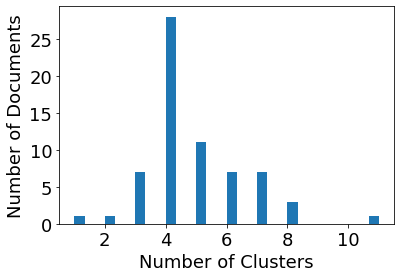

In [296]:
plt.hist(sal_pd["clusters"].apply(len), bins=30)
plt.xlabel("Number of Clusters")
plt.ylabel("Number of Documents")


In [257]:
sal_pd

,clusters,doc_id,spans
0,"{'MAE': [[5334, 5335], [6312, 6313], [9448, 94...",02567fd428a675ca91a0c6786f47f3e35881bcbd,"[[2, 6], [7, 9], [9, 12], [13, 14], [18, 19], ..."
1,"{'Language_Modelling': [[246, 247], [152, 154]...",02b3d1d162080d9aefd3fc30a0bcc9a843073b5d,"[[8, 11], [12, 16], [21, 23], [41, 43], [62, 6..."
2,"{'Self-paced_curriculum_learning': [[1967, 197...",0398552184f80db111e9c28bf533b395f233ac00,"[[1, 3], [4, 8], [10, 15], [18, 23], [24, 25],..."
3,{'RNN___VGG___LSTM_acoustic_model_trained_on_S...,05d2700846c0323f79c1344aca5333994c7c03a5,"[[3, 11], [16, 21], [24, 27], [32, 33], [41, 4..."
4,"{'Inception_V3': [[3121, 3123], [717, 721], [8...",0626908dd710b91aece1a81f4ca0635f23fc47f3,"[[4, 6], [7, 9], [9, 11], [24, 27], [37, 40], ..."
5,"{'Weakly_Supervised_Object_Detection': [[1253,...",0678a8abea82793993cd89383319da75f6dc4be3,"[[2, 3], [7, 11], [12, 15], [21, 23], [59, 60]..."
6,"{'bicubic': [[1670, 1672], [1085, 1087], [2061...",081531984770a74e87dbd68907061b4b0f3631bf,"[[2, 9], [10, 14], [15, 17], [17, 20], [23, 27..."
7,"{'LINE': [[1258, 1259], [5320, 5321], [1980, 1...",0834e74304b547c9354b6d7da6fa78ef47a48fa8,"[[4, 10], [16, 21], [22, 27], [36, 37], [38, 4..."
8,"{'Grammatical_Error_Detection': [[49, 51], [25...",0a3381f0432c5cfe491c718349d7a44e5814592c,"[[2, 6], [7, 9], [10, 12], [22, 25], [29, 31],..."
9,"{'Pedestrian_Detection': [[4769, 4770], [5937,...",0a6c36de8726b6feaab586046ddc1d1a008f44f9,"[[2, 5], [6, 8], [18, 20], [26, 33], [37, 40],..."


### Relation Extraction

In [240]:
rel_file = '/home/pbaweja/SciREX/test_outputs/relations_predictions_gold_salient_clusters.jsonl'
rel_pd = pd.read_json(path_or_buf=rel_file, lines=True)

In [241]:
rel_pd

,doc_id,predicted_relations
0,02567fd428a675ca91a0c6786f47f3e35881bcbd,"[[[ChaLearn_2015, MAE, Age_Estimation, DLDL_VG..."
1,02b3d1d162080d9aefd3fc30a0bcc9a843073b5d,[]
2,0398552184f80db111e9c28bf533b395f233ac00,[]
3,05d2700846c0323f79c1344aca5333994c7c03a5,"[[[Switchboard___Hub500, Percentage_error, Spe..."
4,0626908dd710b91aece1a81f4ca0635f23fc47f3,[]
5,0678a8abea82793993cd89383319da75f6dc4be3,"[[[COCO, MAP, Weakly_Supervised_Object_Detecti..."
6,081531984770a74e87dbd68907061b4b0f3631bf,[]
7,0834e74304b547c9354b6d7da6fa78ef47a48fa8,[]
8,0a3381f0432c5cfe491c718349d7a44e5814592c,[]
9,0a6c36de8726b6feaab586046ddc1d1a008f44f9,"[[[Caltech, Reasonable_Miss_Rate, Pedestrian_D..."


In [242]:
test_df["n_ary_relations"][0]

[{'Material': 'ChaLearn_2015',
  'Method': 'DLDL_VGG-Face',
  'Metric': 'MAE',
  'Task': 'Age_Estimation',
  'score': '3.51'},
 {'Material': 'MORPH_Album2',
  'Method': 'DLDL_VGG-Face',
  'Metric': 'MAE',
  'Task': 'Age_Estimation',
  'score': '2.42±0.01'}]

In [243]:
rel_pd["predicted_relations"][0]

[[['ChaLearn_2015', 'MAE', 'Age_Estimation', 'DLDL_VGG-Face'], 0.9607, 1],
 [['MORPH_Album2', 'MAE', 'Age_Estimation', 'DLDL_VGG-Face'], 0.9607, 1]]

In [244]:
rel_pd["predicted_relations"][1]

[]

In [255]:
len(rel_pd[rel_pd["predicted_relations"].apply(len) == 0])

23

In [294]:
rel_pd[rel_pd["predicted_relations"].apply(len) >= 30]["predicted_relations"][19]

[[['BUCC_French-to-English',
   'Accuracy',
   'Cross-Lingual_Bitext_Mining',
   'BiLSTM'],
  0.9028,
  0],
 [['BUCC_French-to-English',
   'Accuracy',
   'Cross-Lingual_Bitext_Mining',
   'Massively_Multilingual_Sentence_Embeddings'],
  0.9232,
  0],
 [['BUCC_French-to-English',
   'Accuracy',
   'Cross-Lingual_Document_Classification',
   'BiLSTM'],
  0.9062,
  0],
 [['BUCC_French-to-English',
   'Accuracy',
   'Cross-Lingual_Document_Classification',
   'Massively_Multilingual_Sentence_Embeddings'],
  0.9187000000000001,
  0],
 [['BUCC_French-to-English',
   'Accuracy',
   'Cross-Lingual_Natural_Language_Inference',
   'BiLSTM'],
  0.9462,
  1],
 [['BUCC_French-to-English',
   'Accuracy',
   'Cross-Lingual_Natural_Language_Inference',
   'Massively_Multilingual_Sentence_Embeddings'],
  0.9457000000000001,
  1],
 [['BUCC_German-to-English',
   'Accuracy',
   'Cross-Lingual_Bitext_Mining',
   'BiLSTM'],
  0.8894000000000001,
  0],
 [['BUCC_German-to-English',
   'Accuracy',
   'Cross-

Text(0, 0.5, 'Number of Documents')

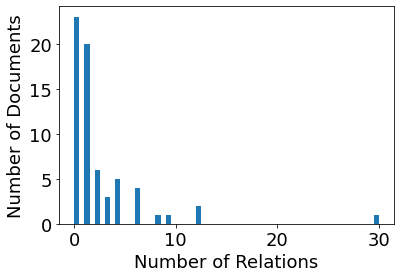

In [298]:
plt.hist(rel_pd["predicted_relations"].apply(len), bins=60)
plt.xlabel("Number of Relations")
plt.ylabel("Number of Documents")


Text(0, 0.5, 'Number of Documents')

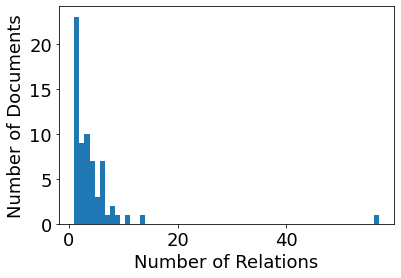

In [297]:
plt.hist(test_df["n_ary_relations"].apply(len), bins=60)
plt.xlabel("Number of Relations")
plt.ylabel("Number of Documents")


In [234]:
test_df["n_ary_relations"][19]

[{'Material': 'BUCC_French-to-English',
  'Method': 'Massively_Multilingual_Sentence_Embeddings',
  'Metric': 'F1_score',
  'Task': 'Cross-Lingual_Bitext_Mining',
  'score': '93.91'},
 {'Material': 'BUCC_German-to-English',
  'Method': 'Massively_Multilingual_Sentence_Embeddings',
  'Metric': 'F1_score',
  'Task': 'Cross-Lingual_Bitext_Mining',
  'score': '96.19'},
 {'Material': 'MLDoc_Zero-Shot_English-to-French',
  'Method': 'Massively_Multilingual_Sentence_Embeddings',
  'Metric': 'Accuracy',
  'Task': 'Cross-Lingual_Document_Classification',
  'score': '77.95%'},
 {'Material': 'MLDoc_Zero-Shot_English-to-German',
  'Method': 'Massively_Multilingual_Sentence_Embeddings',
  'Metric': 'Accuracy',
  'Task': 'Cross-Lingual_Document_Classification',
  'score': '84.78%'},
 {'Material': 'MLDoc_Zero-Shot_English-to-Spanish',
  'Method': 'Massively_Multilingual_Sentence_Embeddings',
  'Metric': 'Accuracy',
  'Task': 'Cross-Lingual_Document_Classification',
  'score': '77.33%'},
 {'Material':

In [282]:
b = test_df[test_df["n_ary_relations"].apply(len) == 1]["doc_id"].tolist()

In [284]:
a = rel_pd[rel_pd["predicted_relations"].apply(len) == 0]["doc_id"].tolist()

In [287]:
count = 0
for i in b:
    if b in a:
        count += 1

In [288]:
count

0

In [291]:
a = rel_pd[rel_pd["predicted_relations"].apply(len) >= 0]["doc_id"].tolist()

In [292]:
b = test_df[test_df["n_ary_relations"].apply(len) >= 0]["doc_id"].tolist()

In [293]:
import collections
collections.Counter(a) == collections.Counter(b)

True